In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [402]:
dataset = pd.read_csv('train.csv')
X_train = dataset.iloc[:, 2:].values # passenger id doesnt matter
y_train = dataset.iloc[:, 1].values # our dependent variable survived
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [403]:
# we see that we have categorical data name, sex, ticket, cabin and embarked
# quantitative data Pclass, Age, SibSp, Parch, Fare
# we can make a new catagory called title and get rid of name
# replace missing values in age by median

In [404]:
print(X_train)

[[3 'Braund, Mr. Owen Harris' 'male' ... 7.25 nan 'S']
 [1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' ...
  71.2833 'C85' 'C']
 [3 'Heikkinen, Miss. Laina' 'female' ... 7.925 nan 'S']
 ...
 [3 'Johnston, Miss. Catherine Helen "Carrie"' 'female' ... 23.45 nan 'S']
 [1 'Behr, Mr. Karl Howell' 'male' ... 30.0 'C148' 'C']
 [3 'Dooley, Mr. Patrick' 'male' ... 7.75 nan 'Q']]


In [405]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_train[:, 3:4])
Ages = imputer.transform(X_train[:, 3:4])

In [406]:
i = 0
for age in Ages:
    if age <= 10:
       Ages[i] = 0
    elif age <= 20:
       Ages[i] = 1
    elif age <= 30:
       Ages[i] = 2
    elif age <= 40:
       Ages[i] = 3
    elif age <= 50:
       Ages[i] = 4
    elif age <= 60:
       Ages[i] = 5
    elif age <= 70:
       Ages[i] = 6
    elif age <= 80:
       Ages[i] = 7
    elif age <= 90:
       Ages[i] = 8
    else:
        Ages[i] = 9
    i += 1

In [407]:
Ages = Ages[:, 0]
print(Ages)

[2. 3. 2. 3. 3. 2. 5. 0. 2. 1. 0. 5. 1. 3. 1. 5. 0. 2. 3. 2. 3. 3. 1. 2.
 0. 3. 2. 1. 2. 2. 3. 2. 2. 6. 2. 4. 2. 2. 1. 1. 3. 2. 2. 0. 1. 2. 2. 2.
 2. 1. 0. 2. 4. 2. 6. 2. 2. 2. 0. 1. 2. 3. 4. 0. 2. 2. 2. 1. 1. 2. 3. 1.
 2. 2. 3. 2. 2. 2. 0. 2. 2. 2. 2. 2. 1. 3. 1. 2. 2. 2. 2. 1. 4. 2. 5. 2.
 7. 2. 3. 3. 2. 2. 2. 3. 3. 2. 2. 2. 3. 2. 4. 1. 2. 1. 1. 2. 7. 2. 2. 0.
 2. 2. 3. 3. 5. 1. 2. 2. 2. 4. 3. 1. 4. 2. 2. 2. 1. 3. 1. 2. 2. 2. 2. 1.
 1. 1. 2. 0. 3. 4. 5. 2. 5. 4. 2. 5. 1. 2. 2. 2. 4. 3. 2. 1. 0. 0. 2. 4.
 2. 2. 6. 0. 0. 2. 5. 1. 2. 4. 2. 3. 2. 2. 0. 0. 0. 2. 2. 4. 3. 3. 3. 1.
 1. 0. 4. 5. 2. 4. 2. 2. 2. 2. 3. 4. 1. 0. 3. 2. 1. 3. 2. 3. 2. 2. 2. 3.
 2. 4. 3. 2. 1. 2. 5. 2. 3. 2. 1. 2. 1. 2. 3. 2. 5. 0. 2. 2. 4. 0. 1. 3.
 2. 2. 2. 2. 2. 4. 2. 2. 3. 5. 2. 2. 6. 2. 4. 2. 2. 2. 3. 4. 2. 0. 5. 3.
 2. 3. 1. 2. 5. 3. 2. 2. 4. 3. 2. 6. 4. 2. 0. 3. 6. 2. 1. 1. 2. 3. 2. 2.
 4. 2. 2. 1. 3. 2. 2. 2. 2. 0. 2. 4. 2. 2. 1. 2. 2. 0. 2. 1. 2. 2. 2. 1.
 2. 2. 4. 2. 2. 5. 3. 3. 2. 2. 2. 2. 2. 3. 6. 3. 3.

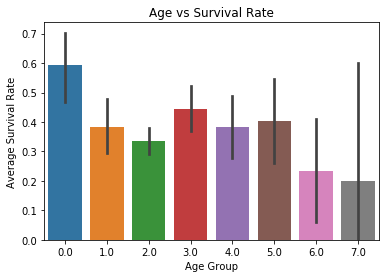

In [408]:
sb.barplot(x = Ages, y = y_train)
plt.title('Age vs Survival Rate')
plt.xlabel('Age Group')
plt.ylabel('Average Survival Rate')
plt.show()

In [409]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_train[:, 7:8])
Fares = imputer.transform(X_train[:, 7:8])

In [410]:
i = 0
for fare in Fares:
    if fare <= 20:
        Fares[i] = 10
    elif fare <= 40:
       Fares[i] = 20
    elif fare <= 60:
       Fares[i] = 30
    elif fare <= 80:
       Fares[i] = 40
    elif fare <= 100:
       Fares[i] = 50
    elif fare <= 300:
       Fares[i] = 200
    elif fare <= 400:
       Fares[i] = 300
    else:
        Fares[i] = 400
    i += 1

In [411]:
Fares = Fares[:, 0]

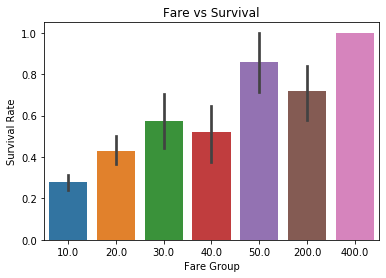

In [412]:
sb.barplot(x = Fares, y = y_train)
plt.title('Fare vs Survival')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()

In [413]:
X_test = pd.read_csv('test.csv')
X_test = X_test.iloc[:, 1:].values

In [414]:
X = np.concatenate((X_train, X_test), 0)
print(X)

[[3 'Braund, Mr. Owen Harris' 'male' ... 7.25 nan 'S']
 [1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' ...
  71.2833 'C85' 'C']
 [3 'Heikkinen, Miss. Laina' 'female' ... 7.925 nan 'S']
 ...
 [3 'Saether, Mr. Simon Sivertsen' 'male' ... 7.25 nan 'S']
 [3 'Ware, Mr. Frederick' 'male' ... 8.05 nan 'S']
 [3 'Peter, Master. Michael J' 'male' ... 22.3583 nan 'C']]


In [415]:
#feature engineering we want to extract a title feature from the names which will be extracted from a , to a .
i = 0
for name in X[:, 1]:
        X[i, 1] = name.split(',')[1].split('.')[0]
        i += 1
print(X)

[[3 ' Mr' 'male' ... 7.25 nan 'S']
 [1 ' Mrs' 'female' ... 71.2833 'C85' 'C']
 [3 ' Miss' 'female' ... 7.925 nan 'S']
 ...
 [3 ' Mr' 'male' ... 7.25 nan 'S']
 [3 ' Mr' 'male' ... 8.05 nan 'S']
 [3 ' Master' 'male' ... 22.3583 nan 'C']]


In [416]:
X = np.delete(X, 6, axis=1) # delete ticket number
X = np.delete(X, 7, axis=1) # delete cabin number

In [417]:
# taking care of missing data
from sklearn.impute import SimpleImputer
#Age, SibSp ParCh, Fare
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, 3:7])
X[:, 3:7] = imputer.transform(X[:, 3:7])

#Embarked
imputere = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputere.fit(X[:, -1:])
X[:, -1:] = imputere.transform(X[:, -1:])

#Title
imputeret = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NoTitle')
imputeret.fit(X[:, 1:2])
X[:, 1:2] = imputeret.transform(X[:, 1:2])

In [418]:
i = 0
for sibsp in X[:, 4]: # go through sibsp column
    X[i, 5] = X[i, 5] + sibsp # add it to the parch colum which will create family size
    i += 1
    
X = np.delete(X, 4, axis=1) # delete cabin number

In [419]:
print(X)

[[3 ' Mr' 'male' ... 1.0 7.25 'S']
 [1 ' Mrs' 'female' ... 1.0 71.2833 'C']
 [3 ' Miss' 'female' ... 0.0 7.925 'S']
 ...
 [3 ' Mr' 'male' ... 0.0 7.25 'S']
 [3 ' Mr' 'male' ... 0.0 8.05 'S']
 [3 ' Master' 'male' ... 2.0 22.3583 'C']]


In [420]:
titles = X[:, 1]
appearences = {} #we need to organize the titles
for title in titles:
    if title not in appearences.keys():
        appearences[title] = 1
    else:
        appearences[title] += 1
print(appearences)

{' Mr': 757, ' Mrs': 197, ' Miss': 260, ' Master': 61, ' Don': 1, ' Rev': 8, ' Dr': 8, ' Mme': 1, ' Ms': 2, ' Major': 2, ' Lady': 1, ' Sir': 1, ' Mlle': 2, ' Col': 4, ' Capt': 1, ' the Countess': 1, ' Jonkheer': 1, ' Dona': 1}


In [421]:
# Replacing less familiar names with more familiar names
off = ['Capt', 'Col', 'Major', 'Dr', 'Rev']
mas = ['Jonkheer', 'Master']
roy = ['Don', 'Sir', 'the Countess', 'Lady', 'Dona']
mrs = ['Mme', 'Ms', 'Mrs']
mis = ['Mlle', 'Miss']
i = 0
for title in X[:, 1]:
    if title in off:
        X[i, 1] = 'Officer'
    elif title in mas:
        X[i, 1] = 'Master'
    elif title in roy:
        X[i, 1] = 'Royalty'
    elif title in mrs:
        X[i, 1] = 'Mrs'
    elif title in mis:
        X[i, 1] = 'Miss'
    i += 1

In [422]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in [1, 2]:
    X[:, col] = label.fit_transform(X[:, col])

In [423]:
X.shape

(1309, 7)

In [424]:
print(X)

[[3 12 1 ... 1.0 7.25 'S']
 [1 13 0 ... 1.0 71.2833 'C']
 [3 9 0 ... 0.0 7.925 'S']
 ...
 [3 12 1 ... 0.0 7.25 'S']
 [3 12 1 ... 0.0 8.05 'S']
 [3 8 1 ... 2.0 22.3583 'C']]


In [425]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [426]:
X.shape

(1309, 9)

In [427]:
# Splitting dataset into train
X_train = X[:len(X_train)]

# Splitting dataset into test
X_test = X[len(X_train):]

In [428]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 8:9] = sc.fit_transform(X_train[:, 8:9])
X_test[:, 9:9] = sc.transform(X_test[:, 8:9])

In [429]:
from sklearn.model_selection import cross_val_score

In [430]:
#random forests model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [431]:
y_pred_random_forest = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
#ar = np.concatenate((y_pred.reshape(len(y_pred_random_forest),1), y_test.reshape(len(y_test),1)),1)

Accuracy: 80.93 %
Standard Deviation: 4.65 %


In [432]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred_KNN = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.23 %
Standard Deviation: 4.52 %


In [437]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_KSVM = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.26 %
Standard Deviation: 4.21 %


In [433]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_SVC = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.67 %
Standard Deviation: 2.86 %


In [438]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_DT = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.58 %
Standard Deviation: 5.19 %


In [434]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred_LR = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy: 79.69 %
Standard Deviation: 2.45 %


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [435]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_NB = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.01 %
Standard Deviation: 2.12 %


In [436]:
#write results in csv file
import csv
with open('predictions.csv', 'w', newline='') as file:
    fieldnames = ['PassengerId', 'Survived']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    idNum = 892
    for i in range(418):
        writer.writerow({'PassengerId': idNum, 'Survived': y_pred_NB[i]})
        idNum += 1
